# Trabajo Semanal 4

Para esta tarea vamos a implementar nociones basicas de la estimacion espectral de tipo senoidal contaminada con ruido:

 $x(n) = a_1 \cdot \sin(\Omega_1 \cdot n) + n_a(n)$

teniendo :   $\Omega_1 = \Omega_0 + f_r \cdot \frac{2\pi}{N}$

Y :     $\Omega_1 = \Omega_0 + f_r \cdot \frac{2\pi}{N}$

con:     $\Omega_0 = \frac{\pi}{2}$



sus variables aleatorias definidas: 
$f_r \sim \mathcal{U}\left(-\frac{1}{2}, \frac{1}{2}\right)$

$n_a \sim \mathcal{N}(0, \sigma^2)$


Se quiere evaluar los sigueinte estiamdores:

de amplitud :   
$\hat{a}_1^{(i)} = \left| X_w^{(i)}(\Omega_0) \right| = \left| \mathcal{F} \{ x(n) \cdot w_i(n) \} \right|$

de frecuencia ; 

$\hat{\Omega}_1^{(i)} = \arg\max_f \left\{ \left| X_w^{(i)}(\Omega) \right| \right\}$




para la i-ésima ventana que analice:

-   rectangular (sin ventana), 
-   flattop 
-   blackmanharris
-   otras que analice
Y siguiendo las siguientes consignas para su experimentación:

Considere 200 realizaciones de 1000 muestras para cada experimento.
Parametrice para SNR's de 3 y 10 db (Ayuda: calibre a1
 para que la potencia de la senoidal sea 1W).

1) Realizar una tabla por cada SNR, que describa el sesgo y la varianza de cada estimador para cada ventana analizada. Recuerde incluir las ventanas rectangular (sin ventana), flattop y blackmanharris y otras que considere.


In [163]:
#Librerias
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlt
from scipy import signal
from scipy.fft import fft, fftshift
import pandas as pd

In [173]:
##Declaracion de variables fijas
N=1000 # Cantidad de muestras
R=200 # Realizaciones
fs=1000 #Frecuecia de muestreo
a1= np.sqrt(2) #Amplitud de la señal
df=fs/N #rResolucion espectral
tt = np.arange(0,1,1/N).reshape((N,1))# Vector de tiempo de columna 1000x1
tt = np.tile(tt, (1, R)) # Vector de 1000x200
Pn= 1/10 #Potencia de ruido cuantizado con 10 dB
Pn_3= 0.5 #Potencia de ruido cuantizado con 3dB

omega_0=fs/4 # Frecuencia central en Heartz
fr=np.random.uniform(-0.5,0.5,size=(1,R)) # Frecuencia aletearia
omega_1= omega_0 + fr*df #Frecuencia a estimar
valor_omega=np.mean(omega_1)#valor medio de omega_1

xx = a1*np.sin(2*np.pi*omega_1*tt) # Hay que multiplicar por 2pi sino, no queda. Señal limpia

sigma=np.sqrt(Pn) # Potencia de ruido. valor para usar en varianza
nn= np.random.normal(0,sigma,size=(N,1)) # Ruido en 1000x1
nn = np.tile(nn, (1, R))

sigma_3= np.sqrt(Pn_3) # Potencia de ruido. valor para usar en varianza
nn_3= np.random.normal(0,sigma_3,size=(N,1)) # Ruido en 1000x1
nn_3= np.tile(nn_3, (1, R))

S_10= xx + nn # Señal con ruido de 10dB
S_3= xx + nn_3 # Señal con ruido de 3dB

In [174]:
##Ventanas

#Calculo de ventanas
window_1 = signal.windows.blackmanharris(N)
window_2 = signal.windows.flattop(N)
window_3 = signal.windows.boxcar(N)
window_4 = signal.windows.triang(N)
window_5 = signal.windows.nuttall(N)

#Reacomodo la matriz de la ventana
win_1=window_1.reshape((N,1))
win_2=window_2.reshape((N,1))
win_3=window_3.reshape((N,1))
win_4=window_4.reshape((N,1))
win_5=window_5.reshape((N,1))

In [175]:
##Transformada
#Aplico la ventana
ventaneo_1 = S_10*win_1
ventaneo_2 = S_10*win_2
ventaneo_3 = S_10*win_3
ventaneo_4 = S_10*win_4
ventaneo_5 = S_10*win_5
ventaneo_6 = S_3*win_1
ventaneo_7 = S_3*win_2
ventaneo_8 = S_3*win_3
ventaneo_9 = S_3*win_4
ventaneo_10 = S_3*win_5

#Calculo la fft
final_fft_1=1/N*np.fft.fft(ventaneo_1,axis=0)
final_fft_2=1/N*np.fft.fft(ventaneo_2,axis=0)
final_fft_3=1/N*np.fft.fft(ventaneo_3,axis=0)
final_fft_4=1/N*np.fft.fft(ventaneo_4,axis=0)
final_fft_5=1/N*np.fft.fft(ventaneo_5,axis=0)
final_fft_6=1/N*np.fft.fft(ventaneo_6,axis=0)
final_fft_7=1/N*np.fft.fft(ventaneo_7,axis=0)
final_fft_8=1/N*np.fft.fft(ventaneo_8,axis=0)
final_fft_9=1/N*np.fft.fft(ventaneo_9,axis=0)
final_fft_10=1/N*np.fft.fft(ventaneo_10,axis=0)

#Aplico el valor absoluta a la transformada
final_BMH = np.abs(final_fft_1)**2
final_FLT = np.abs(final_fft_2)**2
final_BOX = np.abs(final_fft_3)**2
final_TRA = np.abs(final_fft_4)**2
final_NUT = np.abs(final_fft_5)**2
final_BMH_2 = np.abs(final_fft_6)**2
final_FLT_2 = np.abs(final_fft_7)**2
final_BOX_2 = np.abs(final_fft_8)**2
final_TRA_2 = np.abs(final_fft_9)**2
final_NUT_2 = np.abs(final_fft_10)**2

In [176]:
#Calculo de estimadores

indice= N//4
## Amplitud
a_estimador_1= final_BMH[indice] 
a_estimador_2= final_FLT[indice]
a_estimador_3= final_BOX[indice]
a_estimador_4= final_TRA[indice]
a_estimador_5= final_NUT[indice]
a_estimador_6= final_BMH_2[indice] 
a_estimador_7= final_FLT_2[indice] 
a_estimador_8= final_BOX_2[indice] 
a_estimador_9= final_TRA_2[indice] 
a_estimador_10= final_NUT_2[indice] 

##Frecuencia
k_1=np.argmax(final_BMH[:N//2, :],axis=0)
k_2=np.argmax(final_FLT[:N//2, :],axis=0)
k_3=np.argmax(final_BOX[:N//2, :],axis=0)
k_4=np.argmax(final_TRA[:N//2, :],axis=0)
k_5=np.argmax(final_NUT[:N//2, :],axis=0)
k_6=np.argmax(final_BMH_2[:N//2, :],axis=0)
k_7=np.argmax(final_FLT_2[:N//2, :],axis=0)
k_8=np.argmax(final_BOX_2[:N//2, :],axis=0)
k_9=np.argmax(final_TRA_2[:N//2, :],axis=0)
k_10=np.argmax(final_NUT_2[:N//2, :],axis=0)

omega_estimador_1=k_1*df
omega_estimador_2=k_2*df
omega_estimador_3=k_3*df
omega_estimador_4=k_4*df
omega_estimador_5=k_5*df
omega_estimador_6=k_6*df
omega_estimador_7=k_7*df
omega_estimador_8=k_8*df
omega_estimador_9=k_9*df
omega_estimador_10=k_10*df


In [177]:
##Calculo del estimador de amplitud
#Sesgo
esperanza_a_BHK = np.mean(a_estimador_1)
esperanza_a_FLT = np.mean(a_estimador_2)
esperanza_a_BOX = np.mean(a_estimador_3)
esperanza_a_TRA = np.mean(a_estimador_4)
esperanza_a_NUT = np.mean(a_estimador_5)
esperanza_a_BHK_2 = np.mean(a_estimador_6)
esperanza_a_FLT_2 = np.mean(a_estimador_7)
esperanza_a_BOX_2 = np.mean(a_estimador_8)
esperanza_a_TRA_2 = np.mean(a_estimador_9)
esperanza_a_NUT_2 = np.mean(a_estimador_10)


sesgo_a_BHK = esperanza_a_BHK - a1
sesgo_a_FLT = esperanza_a_FLT - a1
sesgo_a_BOX = esperanza_a_BOX - a1
sesgo_a_TRA = esperanza_a_TRA - a1
sesgo_a_NUT = esperanza_a_NUT - a1
sesgo_a_BHK_2 = esperanza_a_BHK_2 - a1
sesgo_a_FLT_2 = esperanza_a_FLT_2 - a1
sesgo_a_BOX_2 = esperanza_a_BOX_2 - a1
sesgo_a_TRA_2 = esperanza_a_TRA_2 - a1
sesgo_a_NUT_2 = esperanza_a_NUT_2 - a1


#Varianza
varianza_a_BHK = np.var(a_estimador_1)
varianza_a_FLT = np.var(a_estimador_2)
varianza_a_BOX = np.var(a_estimador_3)
varianza_a_TRA = np.var(a_estimador_4)
varianza_a_NUT = np.var(a_estimador_5)
varianza_a_BHK_2 = np.var(a_estimador_6)
varianza_a_FLT_2 = np.var(a_estimador_7)
varianza_a_BOX_2 = np.var(a_estimador_8)
varianza_a_TRA_2 = np.var(a_estimador_9)
varianza_a_NUT_2 = np.var(a_estimador_10)

In [178]:
## Calculo del estimador de frecuencia

esperanza_omega_BHK = np.mean(omega_estimador_1)
esperanza_omega_FLT = np.mean(omega_estimador_2)
esperanza_omega_BOX = np.mean(omega_estimador_3)
esperanza_omega_TRA = np.mean(omega_estimador_4)
esperanza_omega_NUT = np.mean(omega_estimador_5)
esperanza_omega_BHK_2 = np.mean(omega_estimador_6)
esperanza_omega_FLT_2 = np.mean(omega_estimador_7)
esperanza_omega_BOX_2 = np.mean(omega_estimador_8)
esperanza_omega_TRA_2 = np.mean(omega_estimador_9)
esperanza_omega_NUT_2 = np.mean(omega_estimador_10)

#Sesgo
sesgo_omega_BHK = esperanza_omega_BHK - valor_omega
sesgo_omega_FLT = esperanza_omega_FLT - valor_omega
sesgo_omega_BOX = esperanza_omega_BOX - valor_omega
sesgo_omega_TRA = esperanza_omega_TRA - valor_omega
sesgo_omega_NUT = esperanza_omega_NUT - valor_omega
sesgo_omega_BHK_2 = esperanza_omega_BHK_2 - valor_omega
sesgo_omega_FLT_2 = esperanza_omega_FLT_2 - valor_omega
sesgo_omega_BOX_2 = esperanza_omega_BOX_2 - valor_omega
sesgo_omega_TRA_2 = esperanza_omega_TRA_2 - valor_omega
sesgo_omega_NUT_2 = esperanza_omega_NUT_2 - valor_omega

#Varianza
varianza_omega_BHK = np.var(omega_estimador_1)
varianza_omega_FLT = np.var(omega_estimador_2)
varianza_omega_BOX = np.var(omega_estimador_3)
varianza_omega_TRA = np.var(omega_estimador_4)
varianza_omega_NUT = np.var(omega_estimador_5)
varianza_omega_BHK_2 = np.var(omega_estimador_6)
varianza_omega_FLT_2 = np.var(omega_estimador_7)
varianza_omega_BOX_2 = np.var(omega_estimador_8)
varianza_omega_TRA_2 = np.var(omega_estimador_9)
varianza_omega_NUT_2 = np.var(omega_estimador_10)

In [ ]:
##Tabla datos

tabla = pd.DataFrame({
    "Sesgo Amplitud (10 dB)": [sesgo_a_BHK, sesgo_a_FLT, sesgo_a_BOX, sesgo_a_TRA, sesgo_a_NUT],
    "Varianza Amplitud (10 dB)": [varianza_a_BHK, varianza_a_FLT, varianza_a_BOX,varianza_a_TRA, varianza_a_NUT],
    "Sesgo Frecuencia (10dB)": [sesgo_omega_BHK,sesgo_omega_FLT,sesgo_omega_BOX,sesgo_omega_TRA,sesgo_omega_NUT],
    "Varianza Frecuencia (10dB)": [varianza_omega_BHK,varianza_omega_FLT,varianza_omega_BOX,varianza_omega_TRA,varianza_omega_NUT],
}, index=["Blackman-Harris", "Flat-top", "Boxcar", "Triangular", "Nuttall"])

tabla.style.set_caption("Tabla de Sesgo y Varianza por Ventana con SNR =10dB") \
    .format("{:.16f}") \
    .set_table_styles([{"selector": "caption", "props": [("font-size", "16px"), ("font-weight", "bold")]}])

,Sesgo Amplitud (10 dB),Varianza Amplitud (10 dB),Sesgo Frecuencia (10dB),Varianza Frecuencia (10dB)
Blackman-Harris,-1.354878225467,0.000011166808,0.013272747768,0.024375000000
Flat-top,-1.391466927323,0.000000117074,-0.281727252231,0.277600000000
Boxcar,-1.043641440456,0.008726954679,0.043272747768,0.004975000000
Triangular,-1.307434298937,0.000171692166,0.043272747768,0.004975000000
Nuttall,-1.353385310158,0.000012470434,0.013272747768,0.024375000000


In [ ]:
tabla = pd.DataFrame({
"Sesgo Amplitud ": [sesgo_a_BHK_2, sesgo_a_FLT_2, sesgo_a_BOX_2, sesgo_a_TRA_2, sesgo_a_NUT_2],
"Varianza Amplitud ":[varianza_a_BHK_2,varianza_a_FLT_2,varianza_a_BOX_2,varianza_a_TRA_2,varianza_a_NUT_2],
"Sesgo Frecuencia":[sesgo_omega_BHK_2, sesgo_omega_FLT_2, sesgo_omega_BOX_2, sesgo_omega_TRA_2, sesgo_omega_NUT_2],
"Varianza Frecuencia":[varianza_omega_BHK_2,varianza_omega_FLT_2,varianza_omega_BOX_2,varianza_omega_TRA_2,varianza_omega_NUT_2]
}, index=["Blackman-Harris", "Flat-top", "Boxcar", "Triangular", "Nuttall"])
tabla.style.set_caption("Tabla de Sesgo y Varianza por Ventana con SNR = 3dB") \
    .format("{:.16f}") \
    .set_table_styles([{"selector": "caption", "props": [("font-size", "16px"), ("font-weight", "bold")]}])

,Sesgo Amplitud,Varianza Amplitud,Sesgo Frecuencia,Varianza Frecuencia
Blackman-Harris,-1.352459869189,0.000023515768,0.013272747768,0.044375000000
Flat-top,-1.390036910667,0.000000776039,-0.271727252231,0.533900000000
Boxcar,-1.030179501513,0.010681665973,0.023272747769,0.014775000000
Triangular,-1.303050153436,0.000256232433,0.013272747768,0.024375000000
Nuttall,-1.350925333016,0.000025680885,0.008272747769,0.039100000000


### Analisis:


Simular el zero-padding:




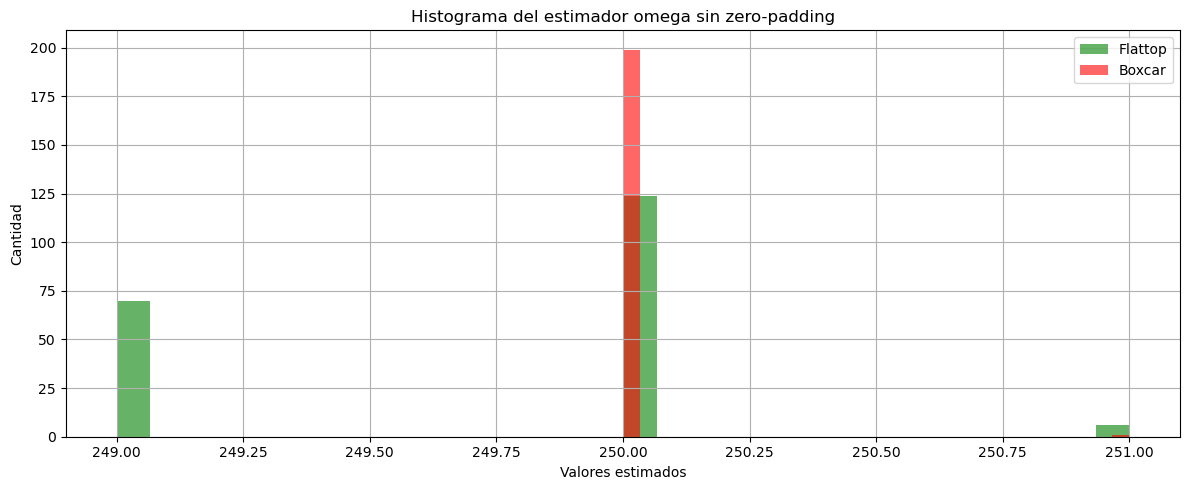

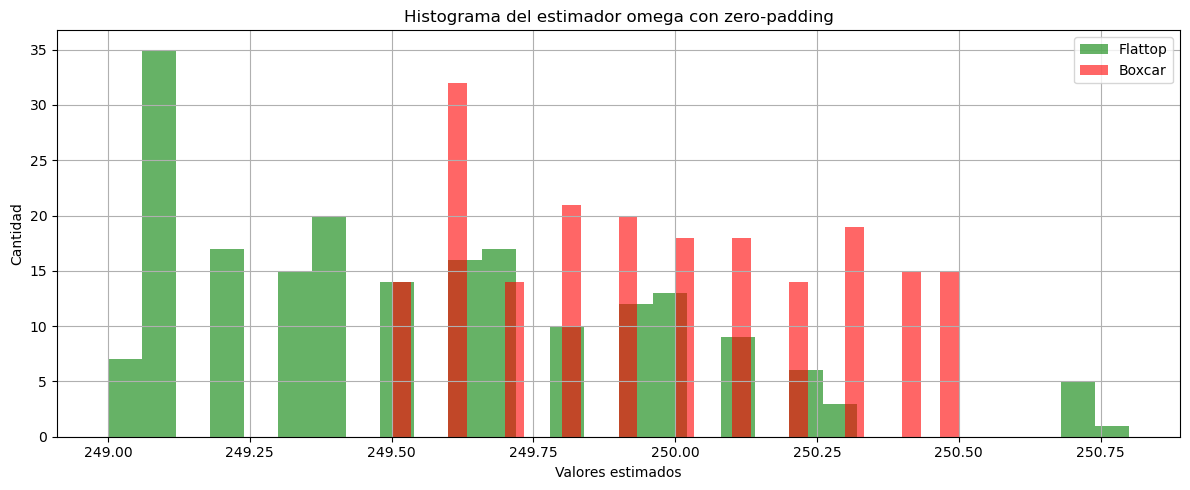

In [181]:
#Redefino una nueva cantidad de muestras
N_2=10*N # Nueva cantidad de muestras
df_2=df*1/10 # Nueva Resolucion espectral

#Uso la señal de 10dB de potencia. 

final_fft_2_padding = 1/N*np.fft.fft(ventaneo_2,n=N_2,axis=0)
final_fft_3_padding = 1/N*np.fft.fft(ventaneo_3,n=N_2,axis=0)
final_FLT_padding = np.abs(final_fft_2_padding)
final_BOX_padding = np.abs(final_fft_3_padding)

k_2_padding=np.argmax(final_FLT_padding[:N_2//2, :],axis=0)
k_3_padding=np.argmax(final_BOX_padding[:N_2//2, :],axis=0)
omega_2_padding=k_2_padding*df_2
omega_3_padding=k_3_padding*df_2

labels = [ 'Flattop', 'Boxcar']
plt.figure(1,figsize=(12, 5))
plt.hist(omega_estimador_2, bins=30, label='Flattop', color='green', alpha=0.6)
plt.hist(omega_estimador_3, bins=30, label='Boxcar', color='red', alpha=0.6)
plt.title('Histograma del estimador omega sin zero-padding')
plt.xlabel('Valores estimados')
plt.ylabel('Cantidad')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(1,figsize=(12, 5))
plt.hist(omega_2_padding, bins=30, label='Flattop', color='green', alpha=0.6)
plt.hist(omega_3_padding, bins=30, label='Boxcar', color='red', alpha=0.6)
plt.title('Histograma del estimador omega con zero-padding')
plt.xlabel('Valores estimados')
plt.ylabel('Cantidad')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
